In [21]:
from HurdatReader import *
from PlotPaths import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
hurdat = trimHurdat(readHurdat('Data/Hurdat.txt'), timeMin = dt.datetime(1900, 1, 1, tzinfo = dt.timezone.utc))

In [67]:
def monthlyBarChartByGroup(hurdat, lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, saveFig = None):
    STORM_STATUSES = ['TS', 'EX', 'TD', 'HU1', 'HU2', 'HU3', 'HU4', 'HU5', 'LO', 'SD', 'SS', 'DB']
    LEGEND = {'TS': 'Tropical Storm', 'EX': 'Extratropical', 'TD': 'Tropical Depression', 'HU1': 'Cat 1 Hurricane', 'HU2': 'Cat 2 Hurricane', 
              'HU3': 'Cat 3 Hurricane', 'HU4': 'Cat 4 Hurricane', 'HU5': 'Cat 5 Hurricane',
              'LO': 'Low', 'SD': 'Subtropical Depression', 'SS': 'Subtropical Storm', 'DB': 'Disturbance'}
    labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    
    date_list = []
    status_list =[]
    for storm in hurdat:
        datapoint = statusNearLocation(hurdat[storm], lon_min, lon_max, lat_min, lat_max, returnTime = True)
        if datapoint is not None:
            status_list.append(datapoint[0])
            date_list.append(datapoint[1].month)
            
    barChartDf = pd.DataFrame()
    for status in STORM_STATUSES:
        barChartDf[status] = np.zeros(12)
        
        
    for month, status in zip(date_list, status_list):
        barChartDf[status][month-1] += 1
        
    bottom = np.zeros(12)
        
    fig, ax = plt.subplots(figsize = (10, 10))
    
    for key in barChartDf:
        if np.sum(barChartDf[key]) == 0: continue
        ax.bar(labels, barChartDf[key], bottom = bottom, label = LEGEND[key])
        bottom += barChartDf[key]
    
    ax.legend()
    ax.set_ylim(0, 0.5 * np.sum(np.sum(barChartDf)))
    
    
    if saveFig is not None:
        plt.savefig(saveFig)
        
    plt.show()
    
        

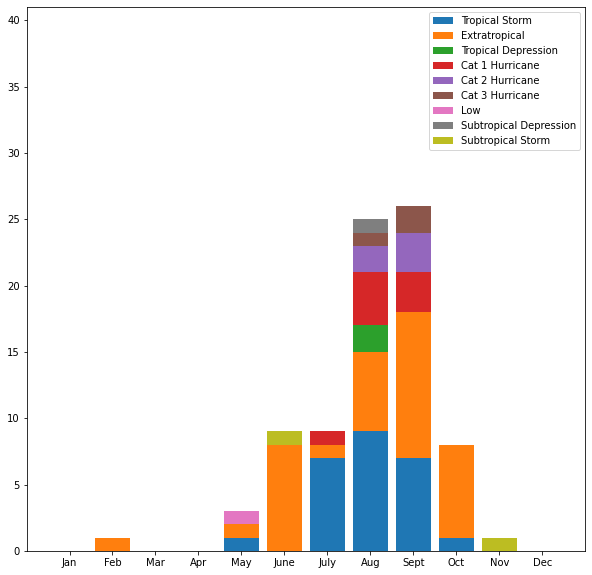

In [68]:
monthlyBarChartByGroup(hurdat, lon_min=-73, lon_max=-69, lat_min=40, lat_max=44)